In [1]:
import os
import pandas as pd
import numpy as np

pd.set_option('max_columns', 200)
pd.set_option('max_rows', 1000)

cwd=os.path.abspath('')
os.chdir('/mnt')
files=os.listdir(cwd)

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [105]:
df = pd.read_csv('/mnt/Datasets/Brazil_CO2_df.csv')

df = df[df['result'] == 'emissions_per_area']

df['yield_per_ha'] = df['Dry_Finished_Yield_Mass_kg']/df['Crop_Area_ha']
df['CO2_value'] = df['value']

df = df.drop(columns = ['Unnamed: 0', 'Harvest_Year', 'Field_Name', 'Latitude', 'Longitude', 'Crop_Area_ha', 'Total_Wet_Mass_Harvested_kg', \
                        'Dry_Finished_Yield_Mass_kg', 'N_as_Urea_%', 'N_as_Nitrate_%', 'N_as_Ammonium_%','P_as_Phosphorus_%', 'P_as_P2O5_%', \
                        'K_as_Potassium_%', 'K_as_K2O_%', 'result', 'value', 'unit'])

#Coding categorical features

#soil drainage: 6350 good, 12 poor
df = df[df['Soil_Drainage'] == 'good']
df = df.drop(columns = ['Soil_Drainage'])

print(display(df))

#Application method: 6228 incorporate, 134 apply in solution

categorical_cols = ['Fertilizer_Type', 'Application_Method', 'Machine']

df = pd.get_dummies(df, columns = categorical_cols)

df = df[~df.isna()].reset_index(drop = True)

print(display(df))

,Soil_Organic_Matter,Soil_pH,Fertilizer_Type,Application_Rate_Unit_kg/ha,Application_Method,Crop_Protection_Application_Doses,Machine,Num_Passes,Total_Water_Applied_mm,yield_per_ha,CO2_value
1,2.50,5.5,Compose your own NPK,300.0,Incorporate,14,herbicide spraying,15,350,3003.333333,-220.35
6,2.50,5.5,Compose your own NPK,300.0,Incorporate,14,pneumatic drill,3,350,3003.333333,-220.35
11,2.50,5.5,Compose your own NPK,200.0,Incorporate,14,herbicide spraying,15,350,3003.333333,-220.35
16,2.50,5.5,Compose your own NPK,200.0,Incorporate,14,pneumatic drill,3,350,3003.333333,-220.35
21,2.50,5.5,Compose your own NPK,150.0,Incorporate,14,herbicide spraying,15,350,3003.333333,-220.35
...,...,...,...,...,...,...,...,...,...,...,...
31786,3.24,5.5,Urea - 46% N,200.0,Incorporate,17,pneumatic drill,3,350,4002.000000,485.73
31791,3.24,5.5,Urea - 46% N,250.0,Incorporate,17,herbicide spraying,15,350,4002.000000,485.73
31796,3.24,5.5,Urea - 46% N,250.0,Incorporate,17,pneumatic drill,3,350,4002.000000,485.73
31801,4.25,5.5,Urea - 46% N,200.0,Incorporate,18,herbicide spraying,15,350,3417.615385,-522.49


None


,Soil_Organic_Matter,Soil_pH,Application_Rate_Unit_kg/ha,Crop_Protection_Application_Doses,Num_Passes,Total_Water_Applied_mm,yield_per_ha,CO2_value,Fertilizer_Type_Ammonium nitrate - 33.5% N,Fertilizer_Type_Ammonium sulphate - 21% N,Fertilizer_Type_Calcium ammonium nitrate - 27% N,Fertilizer_Type_Compose your own NPK,Fertilizer_Type_Compound NPK - 15% N / 15% K2O / 15% P2O5,Fertilizer_Type_Monoammonium phosphate - 11% N / 52% P2O5,Fertilizer_Type_Muriate of potash / Potassium chloride - 60% K2O,Fertilizer_Type_Poultry layer manure - 1.9% N,Fertilizer_Type_Urea - 46% N,Fertilizer_Type_Urea - 46.4% N,Fertilizer_Type_Urea ammonium nitrate solution - 32% N,Application_Method_Apply in solution,Application_Method_Incorporate,Machine_herbicide spraying,Machine_pneumatic drill
0,2.50,5.5,300.0,14,15,350,3003.333333,-220.35,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,2.50,5.5,300.0,14,3,350,3003.333333,-220.35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,2.50,5.5,200.0,14,15,350,3003.333333,-220.35,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
3,2.50,5.5,200.0,14,3,350,3003.333333,-220.35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,2.50,5.5,150.0,14,15,350,3003.333333,-220.35,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,3.24,5.5,200.0,17,3,350,4002.000000,485.73,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
6346,3.24,5.5,250.0,17,15,350,4002.000000,485.73,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
6347,3.24,5.5,250.0,17,3,350,4002.000000,485.73,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
6348,4.25,5.5,200.0,18,15,350,3417.615385,-522.49,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0


None


In [17]:
print(df['Soil_Drainage'].value_counts())

good    6350
poor      12
Name: Soil_Drainage, dtype: int64


In [19]:
####Yield per Area Train / Test Split
from sklearn.model_selection import train_test_split

X_train, X_tmp, y_train, y_tmp = train_test_split(df.drop(columns = ['yield_per_ha']), df['yield_per_ha'], train_size = .7, random_state = 50)
X_test, X_validate, y_test, y_validate = train_test_split(X_tmp, y_tmp, train_size = .5, random_state = 25)

In [99]:
import keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dropout(.1))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(.1))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = 'mape')

model_hist = model.fit(X_train, 
                       y_train, 
                       epochs = 300, 
                       batch_size = 150, 
                       validation_data = (X_validate, y_validate))

Epoch 1/300
30/30 [==============================] - 1s 9ms/step - loss: 10072590.0323 - mape: 80.3661 - val_loss: 2955582.7500 - val_mape: 44.8662
Epoch 2/300
30/30 [==============================] - 0s 3ms/step - loss: 2533364.0403 - mape: 40.7932 - val_loss: 1704022.2500 - val_mape: 35.8814
Epoch 3/300
30/30 [==============================] - 0s 3ms/step - loss: 1604053.1210 - mape: 36.9041 - val_loss: 1535933.1250 - val_mape: 37.7617
Epoch 4/300
30/30 [==============================] - 0s 3ms/step - loss: 1479126.0403 - mape: 36.5011 - val_loss: 1492147.2500 - val_mape: 36.7223
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 1555413.6290 - mape: 39.1654 - val_loss: 1463806.2500 - val_mape: 36.2047
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 1505301.9073 - mape: 38.7353 - val_loss: 1465494.1250 - val_mape: 36.1990
Epoch 7/300
30/30 [==============================] - 0s 3ms/step - loss: 1472780.3306 - mape: 37.8677 - val_loss: 145

In [100]:
def evaluate_model(model, model_hist, X_validate, y_validate, X_test, y_test):
    print('Training RMSE: ', np.sqrt(model_hist.history['loss'][-1]))
    score = model.evaluate(X_validate, y_validate, verbose = 1)
    print('Validation RMSE: ', np.sqrt(score[0]))
    score = model.evaluate(X_test, y_test, verbose = 1)
    print('Test RMSE: ', np.sqrt(score[0]))

evaluate_model(model, model_hist, X_validate, y_validate, X_test, y_test)

Training RMSE:  1110.5155897149757
30/30 [==============================] - 0s 603us/step - loss: 1239916.5000 - mape: 34.2456
Validation RMSE:  1113.5153793280092
30/30 [==============================] - 0s 530us/step - loss: 1302846.5000 - mape: 35.7219
Test RMSE:  1141.423015362841


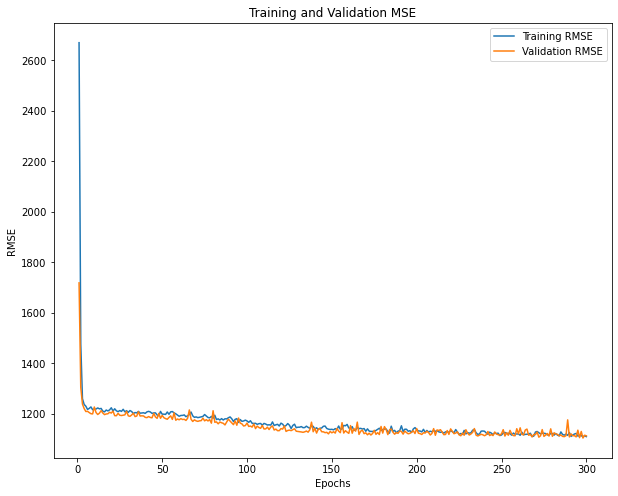

In [101]:
def plot_results(model_hist):
    plt.figure(figsize = (10, 8))
    train_mse = model_hist.history['loss']
    val_mse = model_hist.history['val_loss']
    epochs = range(1, len(train_mse) + 1)
    
    plt.plot(epochs, np.sqrt(train_mse), label = 'Training RMSE')
    plt.plot(epochs, np.sqrt(val_mse), label = 'Validation RMSE')
    plt.title('Training and Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

plot_results(model_hist)

In [104]:
from sklearn.inspection import permutation_importance

# X_full_train = pd.concat([X_train, X_validation])
# y_full_train = pd.concat([y_train, y_validation])

model_list = [model]
model_names = ['ann']

for model_specific in model_list:
    feature_names = X_train.columns

    model_specific.fit(X_train, 
              y_train, 
              epochs = 300, 
              batch_size = 150, 
              validation_data = (X_validate, y_validate))

    result = permutation_importance(
        model_specific, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[model_list.index(model_specific)]) + ')')
    ax.set_ylabel("Mean accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

Epoch 1/300
30/30 [==============================] - 0s 7ms/step - loss: 1236700.6250 - mape: 33.9604 - val_loss: 1267178.5000 - val_mape: 32.6240
Epoch 2/300
30/30 [==============================] - 0s 3ms/step - loss: 1286805.7500 - mape: 34.0936 - val_loss: 1358348.3750 - val_mape: 32.0656
Epoch 3/300
30/30 [==============================] - 0s 3ms/step - loss: 1248409.3750 - mape: 33.7682 - val_loss: 1243890.2500 - val_mape: 35.6442
Epoch 4/300
30/30 [==============================] - 0s 3ms/step - loss: 1260872.8750 - mape: 34.0941 - val_loss: 1275658.7500 - val_mape: 36.1735
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 1252063.7500 - mape: 33.9014 - val_loss: 1228968.1250 - val_mape: 34.4318
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 1252694.1250 - mape: 34.1115 - val_loss: 1305938.2500 - val_mape: 32.4621
Epoch 7/300
30/30 [==============================] - 0s 3ms/step - loss: 1237670.0000 - mape: 33.7568 - val_loss: 1250

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa874434a00> does not.

In [111]:
df = pd.read_csv('/mnt/Datasets/Brazil_CO2_df.csv')

df = df[df['result'] == 'emissions_per_area']

df['yield_per_ha'] = df['Dry_Finished_Yield_Mass_kg']/df['Crop_Area_ha']
df['CO2_value'] = df['value']

#Coding categorical features

df = df.loc[(df['result'] == 'emissions_per_area') & (df['Soil_Drainage'] == 'good') & \
                  (df['Fertilizer_Type'] == 'Compose your own NPK') & (df['Application_Method'] == 'Incorporate') & \
                  (df['Machine'] == 'herbicide spraying')]

df = df.drop(columns = ['Unnamed: 0', 'Harvest_Year', 'Field_Name', 'Latitude', 'Longitude', 'Crop_Area_ha', 'Total_Wet_Mass_Harvested_kg', \
                        'Dry_Finished_Yield_Mass_kg', 'N_as_Urea_%', 'N_as_Nitrate_%', 'N_as_Ammonium_%','P_as_Phosphorus_%', 'P_as_P2O5_%', \
                        'K_as_Potassium_%', 'K_as_K2O_%', 'result', 'value', 'unit', 'Fertilizer_Type', 'Application_Method', 'Machine', 'Soil_Drainage'])

In [112]:
####Yield per Area Train / Test Split
from sklearn.model_selection import train_test_split

X_train, X_tmp, y_train, y_tmp = train_test_split(df.drop(columns = ['yield_per_ha']), df['yield_per_ha'], train_size = .7, random_state = 50)
X_test, X_validate, y_test, y_validate = train_test_split(X_tmp, y_tmp, train_size = .5, random_state = 25)

In [165]:
import keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(.1))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(.1))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = 'mape')

model_hist = model.fit(X_train, 
                       y_train, 
                       epochs = 50, 
                       batch_size = 150, 
                       validation_data = (X_validate, y_validate))

Epoch 1/50
3/3 [==============================] - 1s 72ms/step - loss: 14215985.5000 - mape: 97.9264 - val_loss: 11296436.0000 - val_mape: 82.1980
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 9047555.0000 - mape: 73.5600 - val_loss: 3730777.5000 - val_mape: 45.3975
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 4836774.0000 - mape: 57.8248 - val_loss: 2877949.0000 - val_mape: 40.4879
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 2666861.1250 - mape: 44.2862 - val_loss: 3068287.2500 - val_mape: 36.8901
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 2878618.3750 - mape: 41.3260 - val_loss: 2059059.2500 - val_mape: 31.2616
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 2128148.4688 - mape: 41.7851 - val_loss: 1779841.2500 - val_mape: 34.2901
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 1780291.5312 - mape: 42.5392 - val_loss: 1769139.6250 - v

In [166]:
def evaluate_model(model, model_hist, X_validate, y_validate, X_test, y_test):
    print('Training RMSE: ', np.sqrt(model_hist.history['loss'][-1]))
    score = model.evaluate(X_validate, y_validate, verbose = 1)
    print('Validation RMSE: ', np.sqrt(score[0]))
    score = model.evaluate(X_test, y_test, verbose = 1)
    print('Test RMSE: ', np.sqrt(score[0]))

evaluate_model(model, model_hist, X_validate, y_validate, X_test, y_test)

Training RMSE:  1176.1632008356664
3/3 [==============================] - 0s 2ms/step - loss: 1367092.5000 - mape: 26.4454
Validation RMSE:  1169.2273089523696
3/3 [==============================] - 0s 2ms/step - loss: 1470502.6250 - mape: 34.9674
Test RMSE:  1212.6428266394025


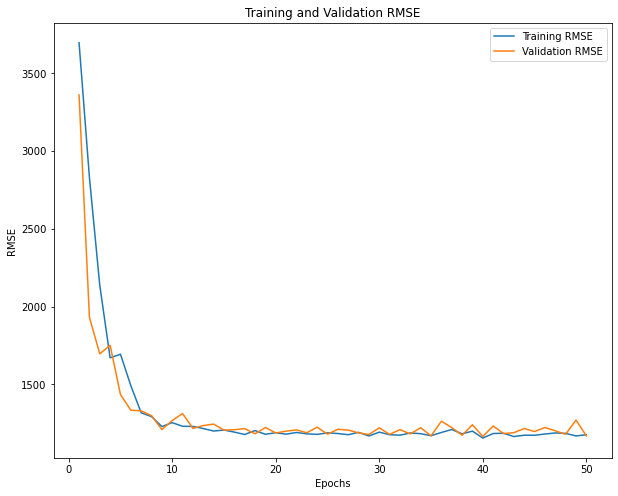

In [167]:
def plot_results(model_hist):
    plt.figure(figsize = (10, 8))
    train_mse = model_hist.history['loss']
    val_mse = model_hist.history['val_loss']
    epochs = range(1, len(train_mse) + 1)
    
    plt.plot(epochs, np.sqrt(train_mse), label = 'Training RMSE')
    plt.plot(epochs, np.sqrt(val_mse), label = 'Validation RMSE')
    plt.title('Training and Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

plot_results(model_hist)

In [21]:
#ANN for most recent analytical dataset 12/5/22

#Yeo-Johnson and Box Cox Transformation, water column retained
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

print(display(df))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

#x values
X_train_yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])
X_test_yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])

power_transform_X = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

power_transform_X_box_cox = PowerTransformer(standardize = True, method = 'box-cox').fit(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
power_transform_X_box_cox.transform(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
power_transform_X_box_cox.transform(X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

min_max_scaler_X = MinMaxScaler().fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', \
                                                               'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha', 'Soil_Organic_Matter', \
                                                               'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha', \
                         'Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
min_max_scaler_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha', \
                         'Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha', \
                         'Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
min_max_scaler_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha', \
                         'Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

#y_values
y_train_yield_per_ha = np.array(train_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)
mean_Yield_kg_per_ha = y_train_yield_per_ha.mean()
y_test_yield_per_ha = np.array(test_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

power_transform_y = PowerTransformer(standardize = True, method = 'box-cox').fit(y_train_yield_per_ha)
y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)
y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

min_max_scaler_y = MinMaxScaler().fit(y_train_yield_per_ha)
y_train_yield_per_ha = min_max_scaler_y.transform(y_train_yield_per_ha)
y_test_yield_per_ha = min_max_scaler_y.transform(y_test_yield_per_ha)

,N_as_Nitrate_kg_per_Ha,P_as_Phosphorus_kg_per_Ha,K_as_Potassium_kg_per_Ha,Soil_Organic_Matter,Yield_Mass_kg_Per_Ha,CO2_kg_Emissions_per_Ha,Total_Water_Applied_mm,Crop_Protection_Application_Doses
0,6000.00,0.00,6000.00,2.500000,4786.900000,349.85,350,14
1,6600.00,0.00,6600.00,2.500000,5234.476190,488.41,350,18
2,6000.00,0.00,6000.00,2.500000,4358.380952,462.26,350,20
3,0.00,0.00,0.00,2.500000,3400.400000,409.14,350,10
4,0.00,0.00,0.00,2.500000,3033.000000,261.38,350,15
5,0.00,0.00,0.00,2.500000,3077.629630,359.71,350,10
6,2600.00,11960.00,0.00,2.500000,4960.000000,1060.97,350,19
7,2600.00,11960.00,0.00,2.500000,4477.614679,490.60,350,19
8,2600.00,11960.00,0.00,2.500000,4445.221239,-85.83,350,18
9,0.00,0.00,0.00,2.500000,4844.298246,-213.99,350,16


None


In [22]:
####Yield per Area Train / Test Split
from sklearn.model_selection import train_test_split

X_train, X_tmp, y_train, y_tmp = train_test_split(X_train_yield_kg_per_ha, y_train_yield_per_ha, train_size = .7, random_state = 50)
X_test, X_validate, y_test, y_validate = train_test_split(X_tmp, y_tmp, train_size = .5, random_state = 25)

In [23]:
import keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dropout(.1))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(.1))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam',
              loss = 'MeanAbsoluteError',
              metrics = 'mape')

model_hist = model.fit(X_train, 
                       y_train, 
                       epochs = 125, 
                       batch_size = 50, 
                       validation_data = (X_validate, y_validate))

Epoch 1/125
11/11 [==============================] - 0s 13ms/step - loss: 0.2411 - mape: 1274296.3035 - val_loss: 0.1199 - val_mape: 29.8624
Epoch 2/125
11/11 [==============================] - 0s 4ms/step - loss: 0.1305 - mape: 203726.9513 - val_loss: 0.1118 - val_mape: 29.7976
Epoch 3/125
11/11 [==============================] - 0s 4ms/step - loss: 0.1235 - mape: 2370937.7708 - val_loss: 0.1184 - val_mape: 31.6718
Epoch 4/125
11/11 [==============================] - 0s 4ms/step - loss: 0.1261 - mape: 99814.8209 - val_loss: 0.1256 - val_mape: 29.5110
Epoch 5/125
11/11 [==============================] - 0s 4ms/step - loss: 0.1257 - mape: 300768.8770 - val_loss: 0.1107 - val_mape: 28.8453
Epoch 6/125
11/11 [==============================] - 0s 4ms/step - loss: 0.1242 - mape: 777386.8648 - val_loss: 0.1145 - val_mape: 28.5840
Epoch 7/125
11/11 [==============================] - 0s 4ms/step - loss: 0.1223 - mape: 1080420.8858 - val_loss: 0.1136 - val_mape: 28.3303
Epoch 8/125
11/11 [=====

In [18]:
def evaluate_model(model, model_hist, X_validate, y_validate, X_test, y_test):
    print('Training RMSE: ', np.sqrt(model_hist.history['loss'][-1]))
    score = model.evaluate(X_validate, y_validate, verbose = 1)
    print('Validation RMSE: ', np.sqrt(score[0]))
    score = model.evaluate(X_test, y_test, verbose = 1)
    print('Test RMSE: ', np.sqrt(score[0]))

evaluate_model(model, model_hist, X_validate, y_validate, X_test, y_test)

Training RMSE:  0.3358328678508085
4/4 [==============================] - 0s 991us/step - loss: 0.1130 - mape: 29.0284
Validation RMSE:  0.3360919486458218
4/4 [==============================] - 0s 1ms/step - loss: 0.1125 - mape: 33.7271
Test RMSE:  0.33534832232447936


In [27]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

0.24807977981025792


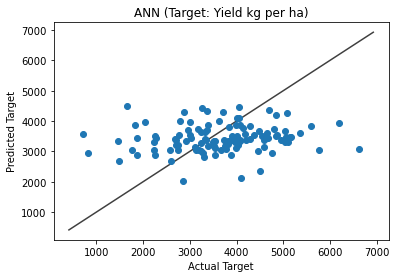

In [32]:

print(mae(power_transform_y.inverse_transform(min_max_scaler_y.inverse_transform(y_test)), power_transform_y.inverse_transform(min_max_scaler_y.inverse_transform(model.predict(X_test))))/mean_Yield_kg_per_ha)

inv_transformed_y_actuals = power_transform_y.inverse_transform(min_max_scaler_y.inverse_transform(y_test))
inv_transformed_preds = power_transform_y.inverse_transform(min_max_scaler_y.inverse_transform(model.predict(X_test)))
fig, ax = plt.subplots()
ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('ANN (Target: Yield kg per ha)')
plt.show()

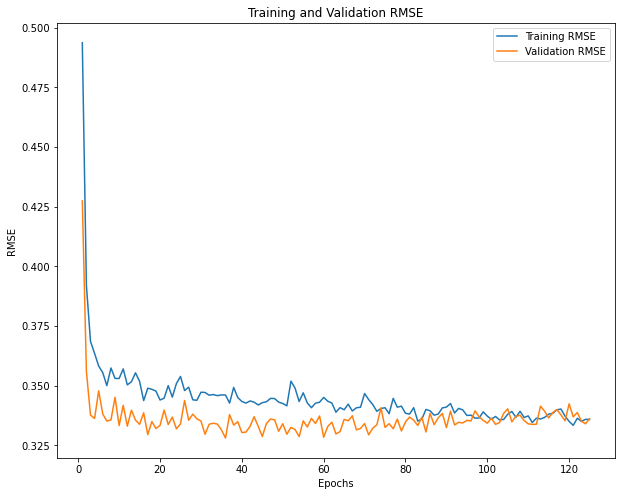

In [19]:
def plot_results(model_hist):
    plt.figure(figsize = (10, 8))
    train_mse = model_hist.history['loss']
    val_mse = model_hist.history['val_loss']
    epochs = range(1, len(train_mse) + 1)
    
    plt.plot(epochs, np.sqrt(train_mse), label = 'Training RMSE')
    plt.plot(epochs, np.sqrt(val_mse), label = 'Validation RMSE')
    plt.title('Training and Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

plot_results(model_hist)

In [20]:
from sklearn.inspection import permutation_importance

model_list = [model]
model_names = ['ann']

for model_specific in model_list:
    feature_names = X_train.columns

    model_specific.fit(X_train, 
              y_train, 
              epochs = 300, 
              batch_size = 150, 
              validation_data = (X_validate, y_validate))

    result = permutation_importance(
        model_specific, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[model_list.index(model_specific)]) + ')')
    ax.set_ylabel("Mean accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

Epoch 1/300
4/4 [==============================] - 0s 22ms/step - loss: 0.1107 - mape: 177489.0469 - val_loss: 0.1156 - val_mape: 29.6590
Epoch 2/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1131 - mape: 201613.4375 - val_loss: 0.1158 - val_mape: 29.1298
Epoch 3/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1106 - mape: 217605.5938 - val_loss: 0.1131 - val_mape: 29.4423
Epoch 4/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1100 - mape: 18687.2910 - val_loss: 0.1129 - val_mape: 29.3352
Epoch 5/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1114 - mape: 158752.9688 - val_loss: 0.1129 - val_mape: 28.8926
Epoch 6/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1114 - mape: 523896.6875 - val_loss: 0.1129 - val_mape: 28.9324
Epoch 7/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1110 - mape: 122506.6406 - val_loss: 0.1126 - val_mape: 29.7668
Epoch 8/300
4/4 [=======================

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f12598417c0> does not.

In [ ]:
#ANN for most recent analytical dataset 12/5/22

#Yeo-Johnson and Box Cox Transformation, water column retained
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

print(display(df))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

#x values
X_train_yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])
X_test_yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])

power_transform_X = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

power_transform_X_box_cox = PowerTransformer(standardize = True, method = 'box-cox').fit(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
power_transform_X_box_cox.transform(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
power_transform_X_box_cox.transform(X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

min_max_scaler_X = MinMaxScaler().fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', \
                                                               'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha', 'Soil_Organic_Matter', \
                                                               'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha', \
                         'Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
min_max_scaler_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha', \
                         'Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha', \
                         'Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
min_max_scaler_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha', \
                         'Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

#y_values
y_train_yield_per_ha = np.array(train_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)
mean_Yield_kg_per_ha = y_train_yield_per_ha.mean()
y_test_yield_per_ha = np.array(test_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

power_transform_y = PowerTransformer(standardize = True, method = 'box-cox').fit(y_train_yield_per_ha)
y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)
y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

min_max_scaler_y = MinMaxScaler().fit(y_train_yield_per_ha)
y_train_yield_per_ha = min_max_scaler_y.transform(y_train_yield_per_ha)
y_test_yield_per_ha = min_max_scaler_y.transform(y_test_yield_per_ha)

In [16]:
#Yeo-Johnson and Box Cox Transformation, water column retained
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

#x values
X_train_yield_kg_per_ha = train_Yield_kg_per_ha[['CO2_kg_Emissions_per_Ha']]
X_test_yield_kg_per_ha = test_Yield_kg_per_ha[['CO2_kg_Emissions_per_Ha']]

power_transform_X = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha)

X_train_yield_kg_per_ha = power_transform_X.transform(X_train_yield_kg_per_ha)
X_test_yield_kg_per_ha = power_transform_X.transform(X_test_yield_kg_per_ha)

min_max_scaler_X = MinMaxScaler().fit(X_train_yield_kg_per_ha)
X_train_yield_kg_per_ha = min_max_scaler_X.transform(X_train_yield_kg_per_ha)

X_test_yield_kg_per_ha = min_max_scaler_X.transform(X_test_yield_kg_per_ha)

#y_values
y_train_yield_per_ha = np.array(train_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)
mean_Yield_kg_per_ha = y_train_yield_per_ha.mean()
y_test_yield_per_ha = np.array(test_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

power_transform_y = PowerTransformer(standardize = True, method = 'box-cox').fit(y_train_yield_per_ha)

y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)
y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

min_max_scaler_y = MinMaxScaler().fit(y_train_yield_per_ha)
y_train_yield_per_ha = min_max_scaler_y.transform(y_train_yield_per_ha)
y_test_yield_per_ha = min_max_scaler_y.transform(y_test_yield_per_ha)

In [17]:
####Yield per Area Train / Test Split
from sklearn.model_selection import train_test_split

X_train, X_tmp, y_train, y_tmp = train_test_split(X_train_yield_kg_per_ha, y_train_yield_per_ha, train_size = .7, random_state = 50)
X_test, X_validate, y_test, y_validate = train_test_split(X_tmp, y_tmp, train_size = .5, random_state = 25)

In [18]:
import keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dropout(.1))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam',
              loss = 'MeanAbsoluteError',
              metrics = 'mape')

model_hist = model.fit(X_train, 
                       y_train, 
                       epochs = 125, 
                       batch_size = 50, 
                       validation_data = (X_validate, y_validate))

Epoch 1/125
11/11 [==============================] - 0s 25ms/step - loss: 0.3609 - mape: 174271.3969 - val_loss: 0.1256 - val_mape: 29.4194
Epoch 2/125
11/11 [==============================] - 0s 4ms/step - loss: 0.1537 - mape: 1253928.0713 - val_loss: 0.1173 - val_mape: 31.0709
Epoch 3/125
11/11 [==============================] - 0s 3ms/step - loss: 0.1417 - mape: 442176.0393 - val_loss: 0.1275 - val_mape: 28.6980
Epoch 4/125
11/11 [==============================] - 0s 3ms/step - loss: 0.1401 - mape: 237244.9793 - val_loss: 0.1094 - val_mape: 28.0065
Epoch 5/125
11/11 [==============================] - 0s 3ms/step - loss: 0.1343 - mape: 2598654.8854 - val_loss: 0.1119 - val_mape: 26.9383
Epoch 6/125
11/11 [==============================] - 0s 3ms/step - loss: 0.1315 - mape: 610168.3708 - val_loss: 0.1064 - val_mape: 27.4920
Epoch 7/125
11/11 [==============================] - 0s 3ms/step - loss: 0.1350 - mape: 2469122.4792 - val_loss: 0.1076 - val_mape: 26.9401
Epoch 8/125
11/11 [====

In [19]:
def evaluate_model(model, model_hist, X_validate, y_validate, X_test, y_test):
    print('Training RMSE: ', np.sqrt(model_hist.history['loss'][-1]))
    score = model.evaluate(X_validate, y_validate, verbose = 1)
    print('Validation RMSE: ', np.sqrt(score[0]))
    score = model.evaluate(X_test, y_test, verbose = 1)
    print('Test RMSE: ', np.sqrt(score[0]))

evaluate_model(model, model_hist, X_validate, y_validate, X_test, y_test)

Training RMSE:  0.34853744270940706
4/4 [==============================] - 0s 773us/step - loss: 0.1086 - mape: 28.2487
Validation RMSE:  0.3294858076001392
4/4 [==============================] - 0s 868us/step - loss: 0.1052 - mape: 33.3428
Test RMSE:  0.32441948800599874


In [20]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

0.23108634302741274


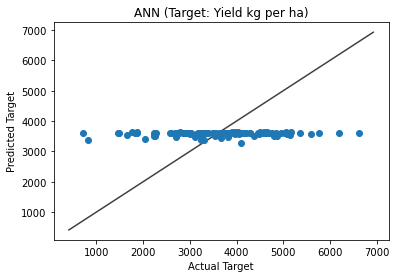

In [21]:

print(mae(power_transform_y.inverse_transform(min_max_scaler_y.inverse_transform(y_test)), power_transform_y.inverse_transform(min_max_scaler_y.inverse_transform(model.predict(X_test))))/mean_Yield_kg_per_ha)

inv_transformed_y_actuals = power_transform_y.inverse_transform(min_max_scaler_y.inverse_transform(y_test))
inv_transformed_preds = power_transform_y.inverse_transform(min_max_scaler_y.inverse_transform(model.predict(X_test)))
fig, ax = plt.subplots()
ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('ANN (Target: Yield kg per ha)')
plt.show()

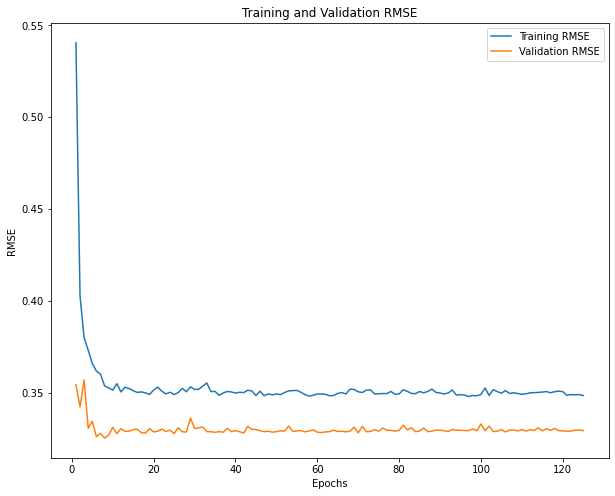

In [22]:
def plot_results(model_hist):
    plt.figure(figsize = (10, 8))
    train_mse = model_hist.history['loss']
    val_mse = model_hist.history['val_loss']
    epochs = range(1, len(train_mse) + 1)
    
    plt.plot(epochs, np.sqrt(train_mse), label = 'Training RMSE')
    plt.plot(epochs, np.sqrt(val_mse), label = 'Validation RMSE')
    plt.title('Training and Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

plot_results(model_hist)